In [1446]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import numpy as np
plt.style.use('seaborn')

In [1447]:
df = pd.read_csv('Csvs/WideReleasesCount.csv')
df.set_index("YEAR", inplace=True)
df.head()

,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
YEAR,,,,,,,,
1995,27,22,11,12,20,17,109,27
1996,31,23,13,16,24,13,120,22
1997,31,22,12,16,22,11,114,22
1998,27,21,11,11,20,16,106,20
1999,27,20,15,13,22,16,113,19


In [1448]:
df2 = pd.read_csv('Csvs/AnnualTicketSales.csv')
df2.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,1995,"1,22,17,05,907","$5,314,421,390","$11,190,826,105",$4.35
1,1996,"1,30,52,21,290","$5,769,078,886","$11,955,781,912",$4.42
2,1997,"1,35,73,49,648","$6,230,235,770","$12,433,322,785",$4.59
3,1998,"1,44,38,32,471","$6,771,575,283","$13,225,505,439",$4.69
4,1999,"1,44,46,64,086","$7,338,894,852","$13,233,123,027",$5.08


In [1449]:
x = df['TOTAL MAJOR 6']

In [1450]:
y = df2['TICKETS SOLD']

<AxesSubplot:xlabel='YEAR'>

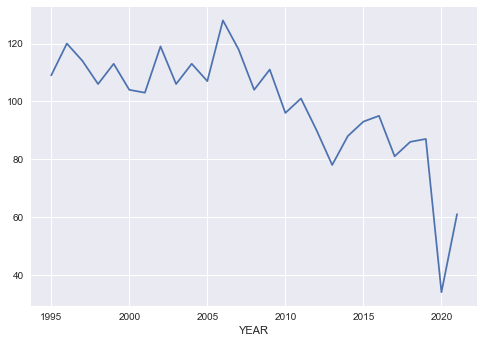

In [1451]:
x.plot()

In [1452]:
y2= y.to_numpy()

In [1453]:
auxiliar = []
indexArray = []
index_aux = 1995
for i in y2:
    y3 = i.split(',')
    y4 = "".join(y3)
    auxiliar.append(int(y4))
    indexArray.append(index_aux)
    index_aux = index_aux + 1

print(auxiliar)


[1221705907, 1305221290, 1357349648, 1443832471, 1444664086, 1397460079, 1465874205, 1575756527, 1524589620, 1495651298, 1372980280, 1398738283, 1420036680, 1358042073, 1418567388, 1328549021, 1282915168, 1380921942, 1339168926, 1257402920, 1323356776, 1302556378, 1225639761, 1311536128, 1228541629, 223638958, 423774881]


<AxesSubplot:>

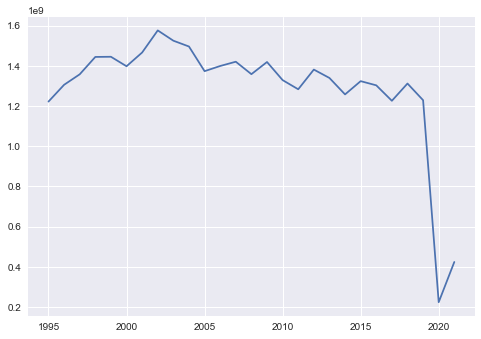

In [1454]:
y = pd.Series(auxiliar)
y.index =indexArray
y.plot()

In [1455]:
df3 = pd.DataFrame(x)
df3['total_sales'] = y
df3

,TOTAL MAJOR 6,total_sales
YEAR,,
1995,109,1221705907
1996,120,1305221290
1997,114,1357349648
1998,106,1443832471
1999,113,1444664086
2000,104,1397460079
2001,103,1465874205
2002,119,1575756527
2003,106,1524589620


In [1456]:
reg_1 = smf.ols("y ~ x", data = df3).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           7.70e-08
Time:                        18:46:49   Log-Likelihood:                -548.39
No. Observations:                  27   AIC:                             1101.
Df Residuals:                      25   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.865e+07   1.66e+08      0.413      0.6

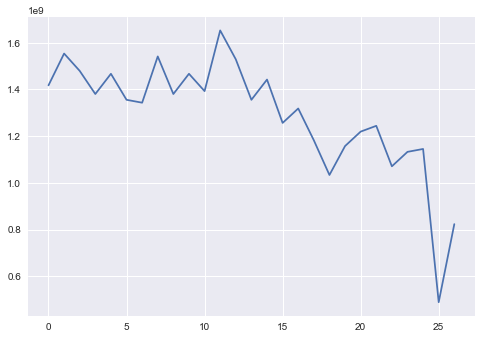

In [1457]:
y_t = reg_1.predict()
plt.plot(y_t)

<AxesSubplot:>

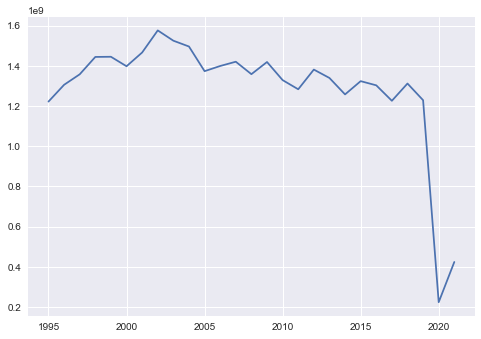

In [1458]:
y.plot()

regresion multiple

<AxesSubplot:xlabel='YEAR'>

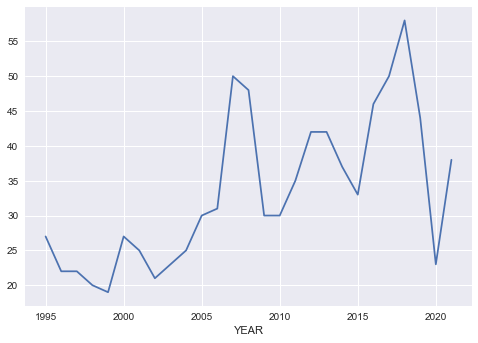

In [1459]:
x2 = df['TOTAL OTHER STUDIOS']
x2.plot()

In [1472]:
x2

YEAR
1995    27
1996    22
1997    22
1998    20
1999    19
2000    27
2001    25
2002    21
2003    23
2004    25
2005    30
2006    31
2007    50
2008    48
2009    30
2010    30
2011    35
2012    42
2013    42
2014    37
2015    33
2016    46
2017    50
2018    58
2019    44
2020    23
2021    38
Name: TOTAL OTHER STUDIOS, dtype: int64

coef = beta de cada variable
R-squared = que tan bien se ajusta el modelo (entre mas alta mejor)

p>|t| = p-value debe ser menor a 0.05 para que la variable sea significativa
f-statistic = debe ser menor a 0.05 para que las variables en conjunto sean significativas

In [1460]:
x_aux = [];
x_temp_1 = x.to_numpy()
x_temp_2 = x2.to_numpy()
for idx, val in enumerate(x):
    x_aux.append(x_temp_1[idx] + x_temp_2[idx])
print(x_aux)

[136, 142, 136, 126, 132, 131, 128, 140, 129, 138, 137, 159, 168, 152, 141, 126, 136, 132, 120, 125, 126, 141, 131, 144, 131, 57, 99]


<AxesSubplot:>

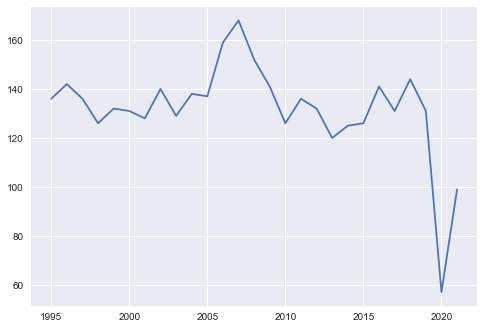

In [1461]:
x_gen = pd.Series(x_aux,name='total_movies')
x_gen.index =indexArray
x_gen.rename("total")
x_gen.plot()

<AxesSubplot:>

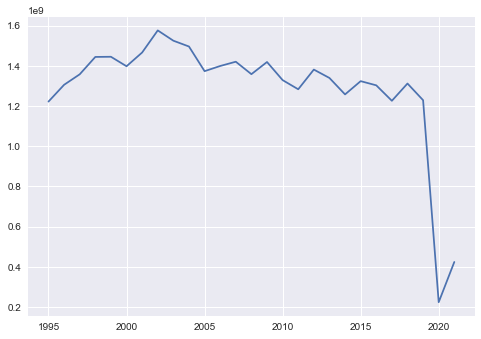

In [1462]:
y = pd.Series(auxiliar)
y.index =indexArray
y.plot()

In [1463]:
df4 = pd.DataFrame(x_gen)
df4['total_sales'] = y
df4

,total_movies,total_sales
1995,136,1221705907
1996,142,1305221290
1997,136,1357349648
1998,126,1443832471
1999,132,1444664086
2000,131,1397460079
2001,128,1465874205
2002,140,1575756527
2003,129,1524589620
2004,138,1495651298


In [1464]:
reg_2 = smf.ols("y ~ x + x2", data = df4).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     31.41
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.99e-07
Time:                        18:46:50   Log-Likelihood:                -546.91
No. Observations:                  27   AIC:                             1100.
Df Residuals:                      24   BIC:                             1104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.765e+08   2.18e+08     -0.810      0.4

Residuos

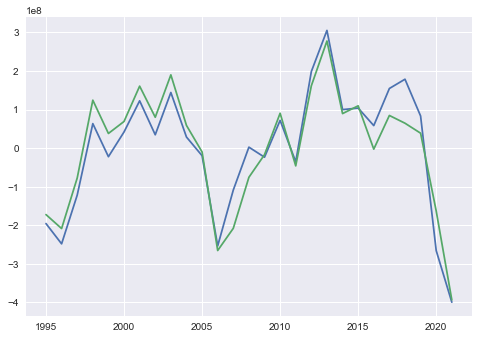

In [1465]:
u2 = reg_2.resid
u2.index = indexArray
plt.plot(u)
plt.plot(u2) #verde
plt.show()

ajuste

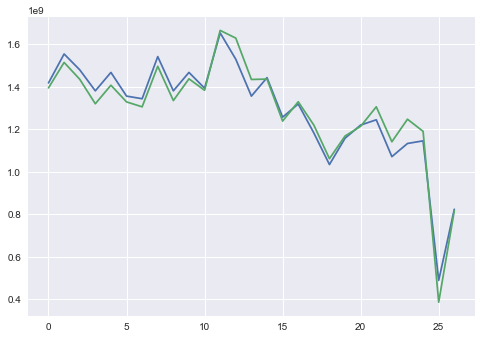

In [1467]:
y_t2 = reg_2.predict()
plt.plot(y_t)
plt.plot(y_t2)

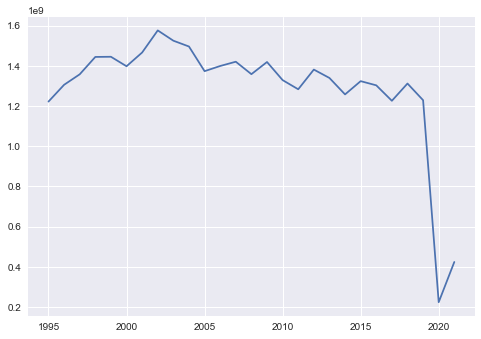

In [1468]:
plt.plot(y)

valor predecido

$y_{t} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... +\beta_{n}x_{n}+ u_{t}$

In [1469]:
intercepto = reg_2.params[0]
beta1 = reg_2.params[1]
beta2 = reg_2.params[2]

resultado = intercepto + beta1*109 + beta2*27

print(resultado)

1394082696.7555351


<AxesSubplot:>

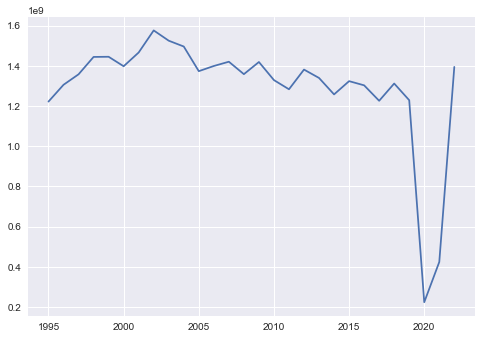

In [1470]:
aux = []
indexArray = []
index_aux = 1995
for i in y.to_numpy():
    aux.append(i)
    indexArray.append(index_aux)
    index_aux = index_aux + 1
aux.append(int(resultado))
indexArray.append(index_aux)
y = pd.Series(aux)
y.index =indexArray
y.plot()